In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from optuna.trial import TrialState
import optuna

db_file= 'hp_tuning_cora_p_mi.db'

In [8]:
import optuna
import matplotlib.pyplot as plt

def make_plots(unlearning_methods, db_file):
    num_methods = len(unlearning_methods)
    cols = 2  # Number of columns for the subplots
    rows = (num_methods + 1) // cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()  # Flatten in case of a single row

    for i, unlearning_method in enumerate(unlearning_methods):
        study = optuna.create_study(
            directions=['maximize', 'maximize'],
            study_name=f"{'Cora'}_{'label'}_{unlearning_method}_{0}",
            load_if_exists=True,
            storage=f'sqlite:///{db_file}',
        )
        trials = study.get_trials()
        values = [(trial.values[1], trial.values[2]) for trial in trials if trial.state==TrialState.COMPLETE]
        forg = [val[0] for val in values]
        util = [val[1] for val in values]

        axes[i].set_xlim(0,1)
        axes[i].set_ylim(0,1)
        axes[i].set_title(unlearning_method)
        axes[i].scatter(forg, util)
        axes[i].set_xlabel('Forgetting')
        axes[i].set_ylabel('Utility')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


[I 2024-08-21 20:32:20,471] Using an existing study with name 'Cora_label_utu_0' instead of creating a new one.
[I 2024-08-21 20:32:20,515] Using an existing study with name 'Cora_label_contrastive_0' instead of creating a new one.
[I 2024-08-21 20:32:20,591] Using an existing study with name 'Cora_label_scrub_0' instead of creating a new one.
[I 2024-08-21 20:32:20,757] Using an existing study with name 'Cora_label_gif_0' instead of creating a new one.
[I 2024-08-21 20:32:20,804] Using an existing study with name 'Cora_label_gnndelete_0' instead of creating a new one.
[I 2024-08-21 20:32:20,902] Using an existing study with name 'Cora_label_gradient_ascent_0' instead of creating a new one.


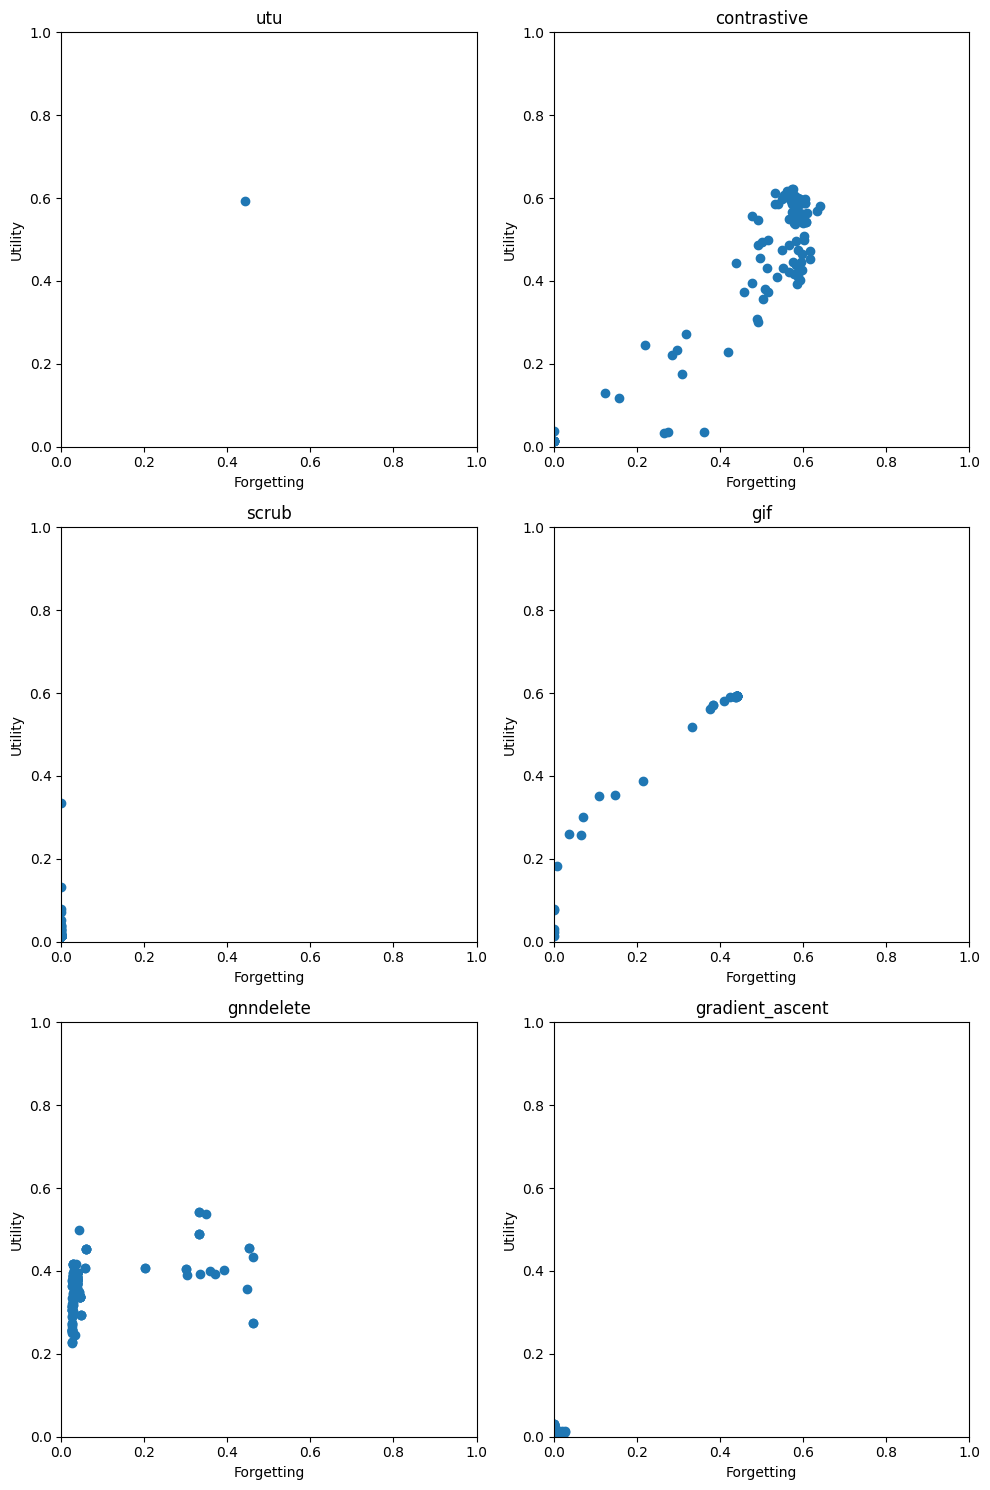

In [9]:
methods=["utu", "contrastive", "scrub", "gif", "gnndelete", "gradient_ascent"]
make_plots(methods, "final_hptune_cora_full_seed_0.db")